## Eurovision_Votes_EDA

In [5]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
# data read
df = pd.read_excel('eurovision_song.xlsx')

In [11]:
df

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
1,1975,f,1975f,J,Belgium,Finland,0,NaN
2,1975,f,1975f,J,Belgium,France,2,NaN
3,1975,f,1975f,J,Belgium,Germany,0,NaN
4,1975,f,1975f,J,Belgium,Ireland,12,NaN
...,...,...,...,...,...,...,...,...
56307,2022,f,2022f,T,United Kingdom,Serbia,1,NaN
56308,2022,f,2022f,T,United Kingdom,Spain,5,NaN
56309,2022,f,2022f,T,United Kingdom,Sweden,4,NaN
56310,2022,f,2022f,T,United Kingdom,Switzerland,0,NaN


In [13]:
df.shape

(56312, 8)

In [14]:
df.tail()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
56307,2022,f,2022f,T,United Kingdom,Serbia,1,NaN
56308,2022,f,2022f,T,United Kingdom,Spain,5,NaN
56309,2022,f,2022f,T,United Kingdom,Sweden,4,NaN
56310,2022,f,2022f,T,United Kingdom,Switzerland,0,NaN
56311,2022,f,2022f,T,United Kingdom,Ukraine,12,NaN


In [15]:
df.describe()

,Year,Points
count,56312.000000,56312.000000
mean,2008.309117,2.648068
std,11.798617,3.666336
min,1975.000000,0.000000
25%,2004.000000,0.000000
50%,2011.000000,0.000000
75%,2017.000000,5.000000
max,2022.000000,12.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56312 entries, 0 to 56311
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                56312 non-null  int64 
 1   (semi-) final       56312 non-null  object
 2   Edition             56312 non-null  object
 3   Jury or Televoting  56312 non-null  object
 4   From country        56312 non-null  object
 5   To country          56312 non-null  object
 6   Points              56312 non-null  int64 
 7   Duplicate           1530 non-null   object
dtypes: int64(2), object(6)
memory usage: 3.4+ MB


In [18]:
df['Year'].unique()

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022])

In [19]:
df['(semi-) final'].unique()

array(['f', 'sf', 'sf1', 'sf2'], dtype=object)

In [21]:
df['Jury or Televoting'].unique()

array(['J', 'T'], dtype=object)

In [25]:
df.Edition.unique()

array(['1975f', '1976f', '1977f', '1978f', '1979f', '1980f', '1981f',
       '1982f', '1983f', '1984f', '1985f', '1986f', '1987f', '1988f',
       '1989f', '1990f', '1991f', '1992f', '1993f', '1994f', '1995f',
       '1996f', '1997f', '1998f', '1999f', '2000f', '2001f', '2002f',
       '2003f', '2004f', '2004sf', '2005f', '2005sf', '2006f', '2006sf',
       '2007f', '2007sf', '2008f', '2008sf1', '2008sf2', '2009f',
       '2009sf1', '2009sf2', '2010f', '2010sf1', '2010sf2', '2011f',
       '2011sf1', '2011sf2', '2012f', '2012sf1', '2012sf2', '2013f',
       '2013sf1', '2013sf2', '2014f', '2014sf1', '2014sf2', '2015f',
       '2015sf1', '2015sf2', '2016f', '2016sf1', '2016sf2', '2017f',
       '2017sf1', '2017sf2', '2018f', '2018sf1', '2018sf2', '2019sf1',
       '2019sf2', '2019f', '2021f', '2021sf1', '2021sf2', '2022sf1',
       '2022sf2', '2022f'], dtype=object)

* Our dataset contains Eurovision song contests from 1975 to 2022. In the first years, until 2003, the contest had only a final. In 2004 the semi-final was introduced and starting from 2008 there were 2 semi-finals. Every country in the contest gives points to other countries: 0, 1, 2, 3, 4, 5, 6, 7, 8, 10 and 12.

In [30]:
df["From country"].unique()

array(['Belgium', 'Finland', 'France', 'Germany', 'Ireland', 'Israel',
       'Italy', 'Luxembourg', 'Malta', 'Monaco', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Turkey',
       'United Kingdom', 'Yugoslavia', 'Austria', 'Greece', 'Denmark',
       'Morocco', 'Cyprus', 'Iceland', 'Bosnia & Herzegovina', 'Croatia',
       'Slovenia', 'Estonia', 'Hungary', 'Lithuania', 'Poland', 'Romania',
       'Russia', 'Slovakia', 'F.Y.R. Macedonia', 'Latvia', 'Ukraine',
       'Albania', 'Andorra', 'Belarus', 'Serbia & Montenegro', 'Bulgaria',
       'Moldova', 'Armenia', 'Czech Republic', 'Georgia', 'Montenegro',
       'Serbia', 'Azerbaijan', 'San Marino', 'Australia', 'Macedonia',
       'North Macedonia', 'Netherlands'], dtype=object)

In [31]:
df.rename(columns={'Points      ': "Points"}, inplace=True)

In [32]:
df.replace('The Netherands', 'The Netherlands', inplace=True)

In [33]:
df.replace(['F.Y.R. Macedonia', 'Macedonia'], 'North Macedonia', inplace=True)

In [37]:
from_countries = df['From country'].unique()
from_countries

array(['Belgium', 'Finland', 'France', 'Germany', 'Ireland', 'Israel',
       'Italy', 'Luxembourg', 'Malta', 'Monaco', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Turkey',
       'United Kingdom', 'Yugoslavia', 'Austria', 'Greece', 'Denmark',
       'Morocco', 'Cyprus', 'Iceland', 'Bosnia & Herzegovina', 'Croatia',
       'Slovenia', 'Estonia', 'Hungary', 'Lithuania', 'Poland', 'Romania',
       'Russia', 'Slovakia', 'North Macedonia', 'Latvia', 'Ukraine',
       'Albania', 'Andorra', 'Belarus', 'Serbia & Montenegro', 'Bulgaria',
       'Moldova', 'Armenia', 'Czech Republic', 'Georgia', 'Montenegro',
       'Serbia', 'Azerbaijan', 'San Marino', 'Australia', 'Netherlands'],
      dtype=object)

In [38]:
to_countries = df['To country'].unique()
to_countries

array(['Belgium', 'Finland', 'France', 'Germany', 'Ireland', 'Israel',
       'Italy', 'Luxembourg', 'Malta', 'Monaco', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Turkey',
       'United Kingdom', 'Yugoslavia', 'Austria', 'Greece', 'Denmark',
       'Morocco', 'Cyprus', 'Iceland', 'Bosnia & Herzegovina', 'Croatia',
       'Slovenia', 'Estonia', 'Hungary', 'Lithuania', 'Poland', 'Romania',
       'Russia', 'Slovakia', 'North Macedonia', 'Latvia', 'Ukraine',
       'Albania', 'Serbia & Montenegro', 'Andorra', 'Belarus', 'Moldova',
       'Bulgaria', 'Armenia', 'Georgia', 'Serbia', 'Czech Republic',
       'Montenegro', 'Azerbaijan', 'San Marino', 'Australia',
       'Netherlands'], dtype=object)

In [39]:
np.setxor1d(from_countries, to_countries)

array([], dtype=object)

In [40]:
df.groupby(['Year', 'To country']).sum()

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3583998032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Year', 'To country']).sum()


Points
Year To country            
1975 Belgium             17
     Finland             74
     France              91
     Germany             15
     Ireland             68
...                     ...
2022 Spain              445
     Sweden             828
     Switzerland        196
     Ukraine            961
     United Kingdom     465

[1353 rows x 1 columns]

In [41]:
df.duplicated().sum()

0

In [42]:
df = df[df['Duplicate'] != 'x']
df.drop('Duplicate', axis=1, inplace=True)

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3160790365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Duplicate', axis=1, inplace=True)


In [43]:
df.isnull().sum()

Year                  0
(semi-) final         0
Edition               0
Jury or Televoting    0
From country          0
To country            0
Points                0
dtype: int64

In [44]:
df_douze = df[df['Points'] == 12][['Jury or Televoting', 'From country', 'To country', 'Points']]
df_zero = df[df['Points'] == 0][['Jury or Televoting', 'From country', 'To country', 'Points']]

In [45]:
# Who gets the most 12 points
df_douze['To country'].value_counts()

Sweden                  182
Ukraine                 136
Russia                  115
Greece                  108
Serbia                   88
Norway                   83
Denmark                  82
Ireland                  74
United Kingdom           73
Portugal                 72
Italy                    72
Cyprus                   69
The Netherlands          64
Israel                   61
France                   61
Azerbaijan               60
Turkey                   60
Armenia                  59
Germany                  57
Switzerland              57
Moldova                  56
Romania                  51
Belgium                  51
Bosnia & Herzegovina     49
Austria                  48
Malta                    47
Iceland                  47
Lithuania                46
Bulgaria                 45
Spain                    44
Estonia                  44
Australia                40
Albania                  38
Finland                  37
North Macedonia          34
Croatia             

In [47]:
# Who gets the most 0 points
df_zero['To country'].value_counts()

Spain                   1022
Germany                  989
Finland                  921
United Kingdom           876
Cyprus                   861
Norway                   855
Portugal                 845
France                   841
Greece                   827
Belgium                  822
Iceland                  785
Denmark                  778
Austria                  770
Israel                   762
The Netherlands          750
Lithuania                711
Slovenia                 683
Switzerland              663
Ireland                  662
Sweden                   647
Estonia                  640
Albania                  636
Malta                    619
Croatia                  617
Poland                   601
Romania                  586
North Macedonia          584
Turkey                   573
Moldova                  555
Serbia                   531
Azerbaijan               519
Hungary                  515
Belarus                  505
Latvia                   498
Armenia       

In [48]:
df_douze.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')

,To country,From country,counts
0,Greece,Cyprus,37
1,Cyprus,Greece,32
2,Romania,Moldova,20
3,Moldova,Romania,18
4,Sweden,Denmark,18
...,...,...,...
982,Israel,Belgium,1
983,Israel,Croatia,1
984,Israel,Cyprus,1
985,Israel,Georgia,1


We can see the political relationships between countries by giving 12 points to each other:

* Cyprus -> Greece, 37 times!
* Greece -> Cyprus, 32 times!
* Moldova -> Romania, 20 times!
Denmark -> Sweden, 18 times!
* Romania -> Moldova, 18 times!


## Which countries gives the most 12 points to...

In [53]:
country = 'Turkey'

In [54]:
df_temp = df_douze.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts').groupby('To country').head(20)
df_temp[df_temp['To country'] == country].sort_values(by='counts', ascending=False)

,To country,From country,counts
45,Turkey,Germany,8
47,Turkey,France,8
71,Turkey,The Netherlands,7
80,Turkey,Belgium,6
84,Turkey,Azerbaijan,6
134,Turkey,Bosnia & Herzegovina,4
138,Turkey,United Kingdom,4
257,Turkey,Albania,3
274,Turkey,Switzerland,3
455,Turkey,North Macedonia,2


### Every country with the country that gives the most 12 points

In [55]:
df_douze_points_countries_relationships = df_douze.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')
df_douze_points_countries_relationships.drop_duplicates(subset=['To country'], keep='first', inplace=True)
df_douze_points_countries_relationships

,To country,From country,counts
0,Greece,Cyprus,37
1,Cyprus,Greece,32
2,Romania,Moldova,20
3,Moldova,Romania,18
4,Sweden,Denmark,18
5,Serbia,Montenegro,16
6,Albania,North Macedonia,16
7,Russia,Belarus,15
10,Lithuania,Ireland,13
12,Ukraine,Poland,12


### Every country with the country that gives the most 0 points

In [56]:
df_zero.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')

,To country,From country,counts
0,Spain,Sweden,41
1,Norway,France,40
2,Spain,Ireland,38
3,Finland,Belgium,37
4,Spain,Germany,37
...,...,...,...
2403,Italy,Slovakia,1
2404,Slovenia,Serbia & Montenegro,1
2405,Italy,Morocco,1
2406,Italy,Montenegro,1


In [57]:
df_zero_points_countries_relationships = df_zero.groupby(['To country', 'From country']).size().sort_values(ascending=False).reset_index(name='counts')
df_zero_points_countries_relationships.drop_duplicates(subset=['To country'], keep='first', inplace=True)
df_zero_points_countries_relationships

,To country,From country,counts
0,Spain,Sweden,41
1,Norway,France,40
3,Finland,Belgium,37
6,Germany,Israel,36
13,Cyprus,Austria,34
17,Portugal,Israel,34
21,Turkey,Portugal,33
23,Greece,Ireland,33
26,Sweden,Greece,33
36,Israel,Ireland,31


### Average points per country

In [58]:
df_average_points_per_country = df.groupby('To country').agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)

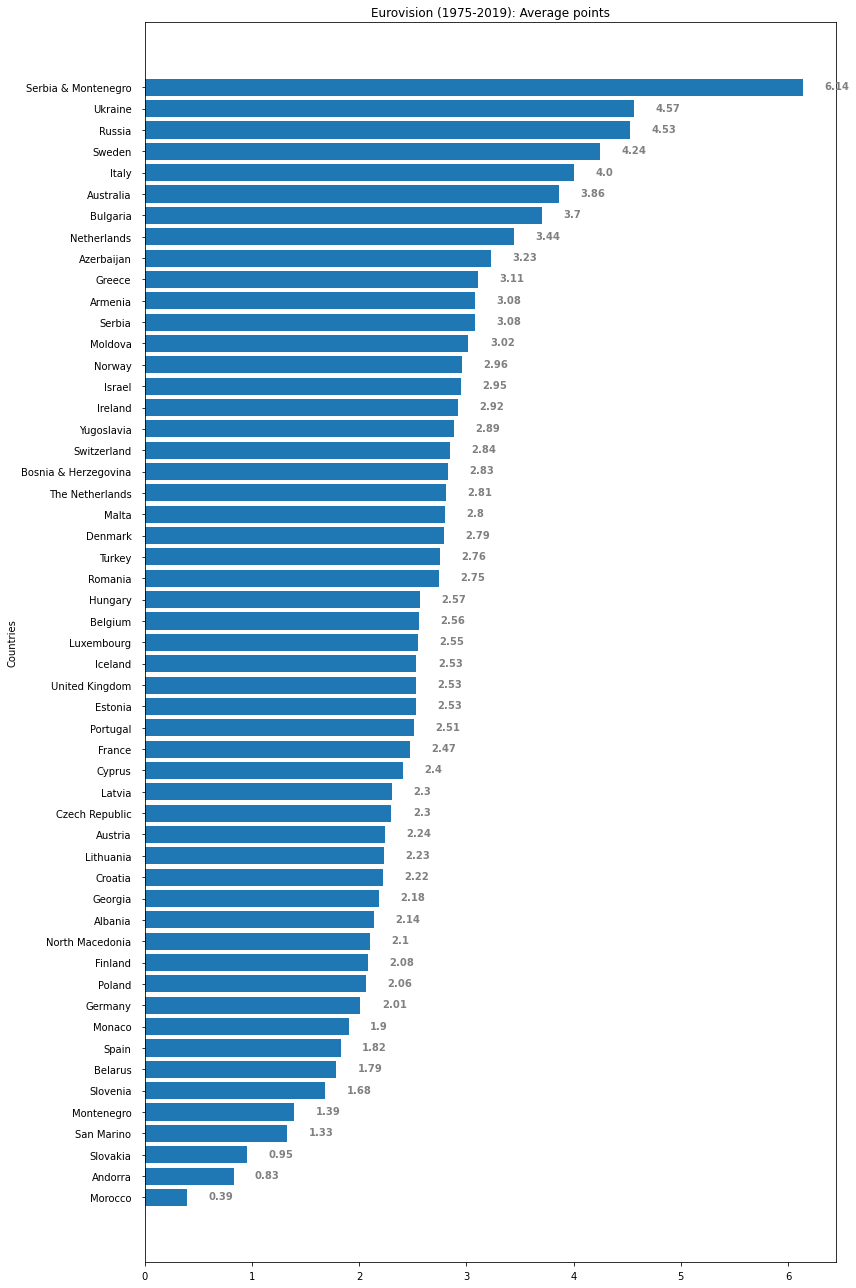

In [59]:
labels = df_average_points_per_country[('Points', 'mean')].index
avg_points = list(df_average_points_per_country[('Points', 'mean')])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (1975-2019): Average points')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

### Average points per country by year

In [60]:
df_average_points_per_country_by_year = df.groupby(['To country', 'Year']).agg({'Points': ['mean']})

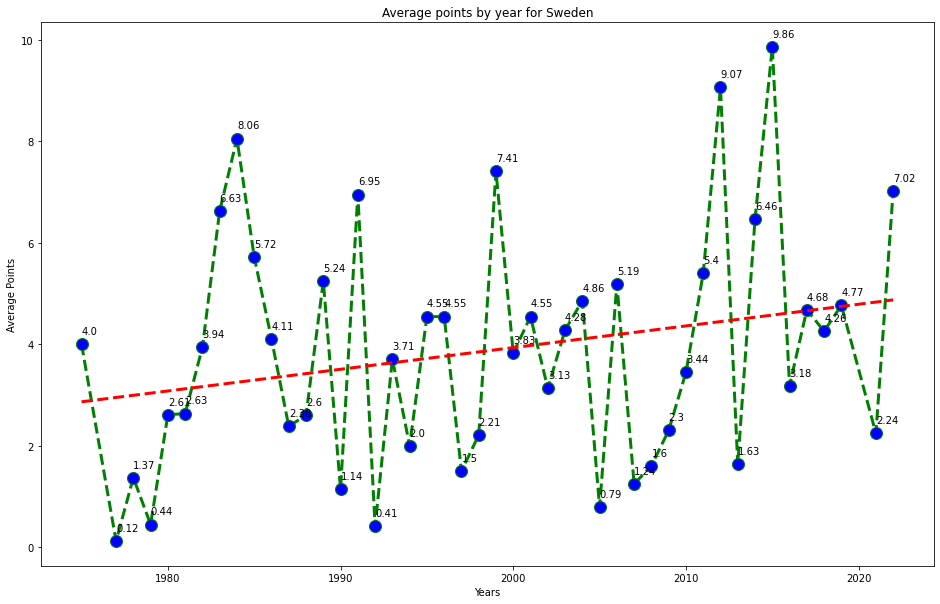

In [61]:
country = 'Sweden'
x = df_average_points_per_country_by_year.loc[[country]].index.get_level_values('Year')
y = df_average_points_per_country_by_year.loc[[country]][('Points', 'mean')]
z = np.poly1d(np.polyfit(x, y, 1))(x)

plt.figure(figsize=(16,10))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.plot(x, z,"r--", linewidth = 3)
for year, average_points in zip(x, y): 
    plt.text(year, average_points+0.2, str(round(average_points, 2)))
plt.xlabel('Years')
plt.ylabel('Average Points')
plt.title('Average points by year for ' + country)
plt.show()

In [62]:
print('Maximum average points for', country, 'is', round(y.max(), 2), 'in', y.idxmax()[1])
print('Minimum average points for', country, 'is', round(y.min(), 2), 'in', y.idxmin()[1])
print('The gradient is',round((z[-1] - z[0]) / (max(x) - min(x)), 3))

Maximum average points for Sweden is 9.86 in 2015
Minimum average points for Sweden is 0.12 in 1977
The gradient is 0.043


### Average points per country in contests with the semi-finals and grand final format (2008-2019)

* We will look only at contests from recent years, from 2008 to 2019, with the format of the 2 semi-finals and the grand final, as we know it today.

In [63]:
df_with_semi_finals = df[df.Year >= df[df['(semi-) final'] == 'sf1']['Year'].unique()[0]]

In [64]:
df_with_semi_finals.head()

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points
21265,2008,f,2008f,J,Albania,Armenia,2
21266,2008,f,2008f,J,Albania,Azerbaijan,0
21267,2008,f,2008f,J,Albania,Bosnia & Herzegovina,0
21268,2008,f,2008f,J,Albania,Croatia,0
21269,2008,f,2008f,J,Albania,Denmark,0


In [67]:
df_average_points_per_country_from_2008 = df_with_semi_finals.groupby('To country').agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)

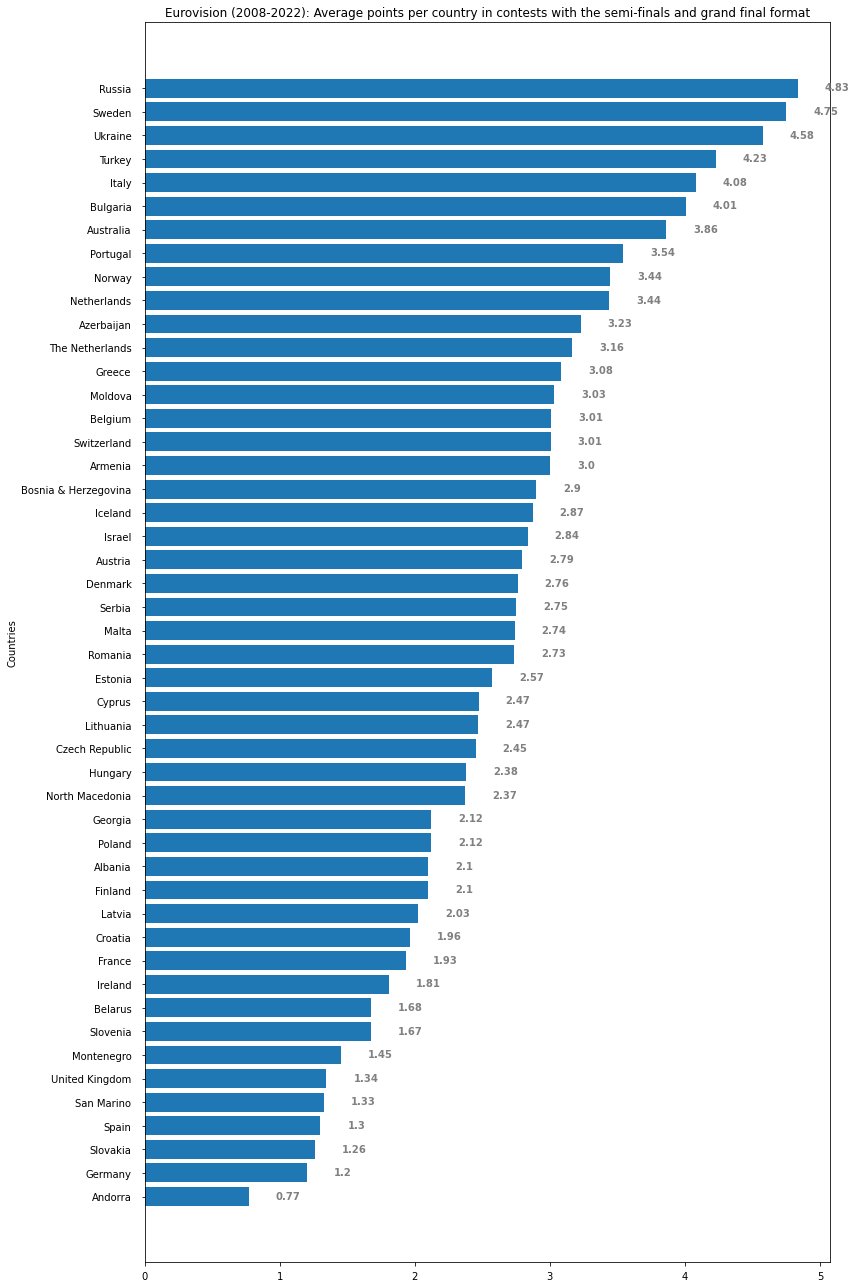

In [80]:
labels = df_average_points_per_country_from_2008[('Points', 'mean')].index
avg_points = list(df_average_points_per_country_from_2008[('Points', 'mean')])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (2008-2022): Average points per country in contests with the semi-finals and grand final format')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

In [69]:
countries_set_semi_finals = set(df_with_semi_finals['From country'])

### Average points for country at the semi-finals

In [70]:
df_average_points_per_country_in_sf = df_with_semi_finals.loc[(df_with_semi_finals['(semi-) final'] == 'sf1') | (df_with_semi_finals['(semi-) final'] == 'sf2')].groupby('To country')['Points'].mean().sort_values(ascending=False).reset_index(name='counts')


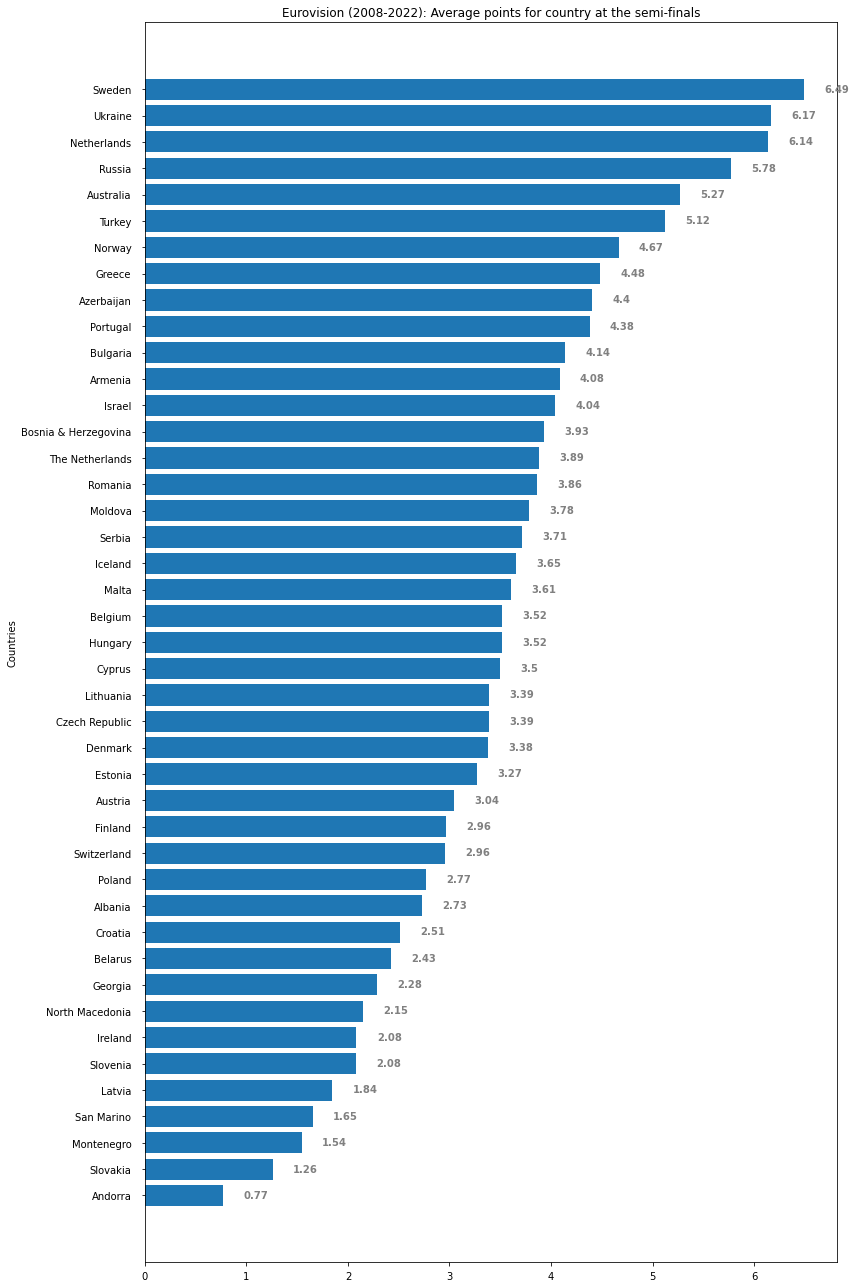

In [79]:
labels = df_average_points_per_country_in_sf['To country']
avg_points = list(df_average_points_per_country_in_sf['counts'])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (2008-2022): Average points for country at the semi-finals')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

### Average points for country at the semi-finals by jury and televoting

In [73]:
df_with_semi_finals_jot_sf = df_with_semi_finals.loc[(df_with_semi_finals['(semi-) final'] == 'sf1') | (df_with_semi_finals['(semi-) final'] == 'sf2')].groupby(['To country', 'Jury or Televoting', ])['Points'].mean()


In [74]:
df1 = df_with_semi_finals_jot_sf.iloc[df_with_semi_finals_jot_sf.index.get_level_values('Jury or Televoting') == 'J'].to_frame(name='Jury Points').reset_index(level=1, drop=True)
df2 = df_with_semi_finals_jot_sf.iloc[df_with_semi_finals_jot_sf.index.get_level_values('Jury or Televoting') == 'T'].to_frame(name='Televoting Points').reset_index(level=1, drop=True)
df_average_jot_sf = pd.merge(df1, df2, left_index=True, right_index=True)
df_average_jot_sf['differnce between Jury and Televoting points'] = abs(df_average_jot_sf['Jury Points'] - df_average_jot_sf['Televoting Points'])
df_average_jot_sf.sort_values(by='differnce between Jury and Televoting points', ascending=False)

,Jury Points,Televoting Points,differnce between Jury and Televoting points
To country,,,
Netherlands,7.888889,4.388889,3.500000
Ukraine,5.399061,8.315789,2.916728
Australia,6.606838,3.940171,2.666667
Greece,5.224265,2.760684,2.463581
Moldova,3.102564,5.358974,2.256410
Hungary,2.940092,5.113924,2.173832
Sweden,7.076596,5.091837,1.984759
Portugal,3.887324,5.763158,1.875834
Cyprus,2.945525,4.703390,1.757865


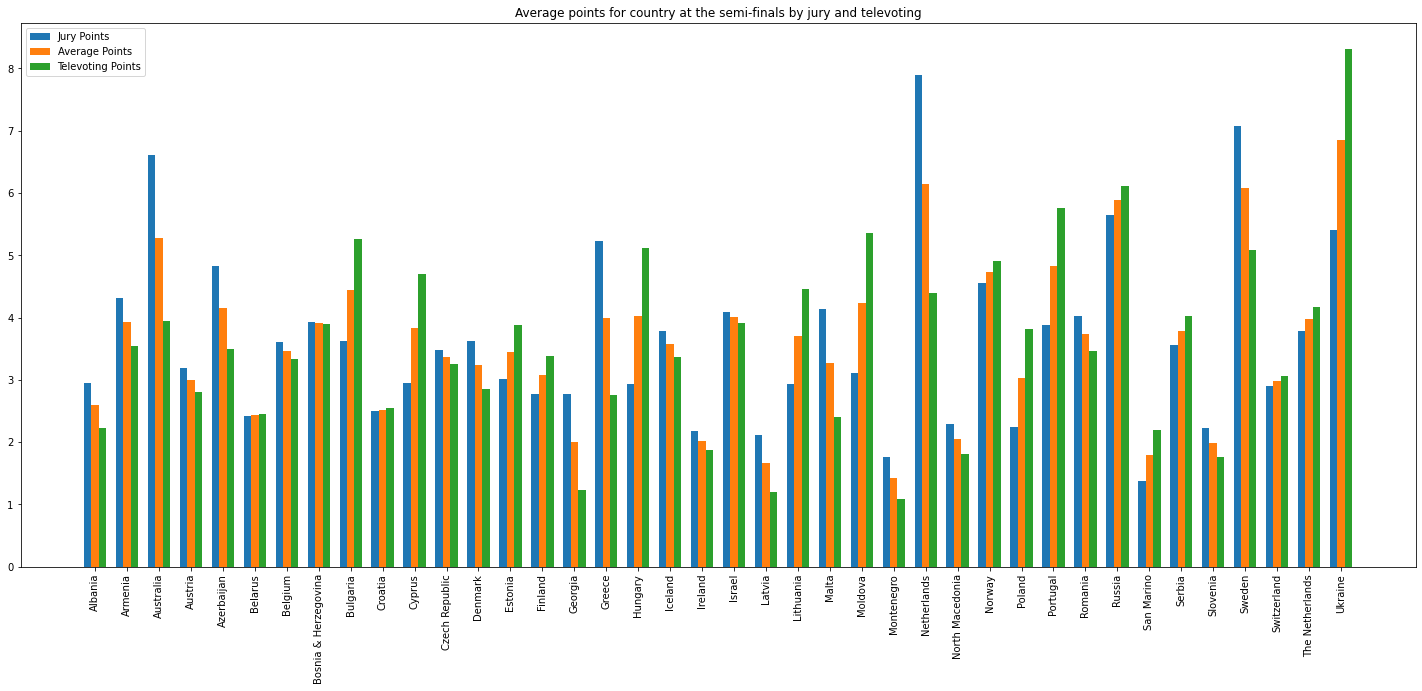

In [75]:
plt.figure(figsize=(25,10))

countries = df_average_jot_sf.index
jury_points = df_average_jot_sf['Jury Points']
avg_points = (df_average_jot_sf['Jury Points'] + df_average_jot_sf['Televoting Points']) / 2
televoting_points = df_average_jot_sf['Televoting Points']

def subcategorybar(countries, vals, width=0.8):
    n = len(vals)
    _countries = np.arange(len(countries))
    for i in range(n):
        plt.bar(_countries - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
    plt.xticks(_countries, countries, rotation='vertical')
    plt.legend(['Jury Points', 'Average Points', 'Televoting Points'])
    plt.title('Average points for country at the semi-finals by jury and televoting')
    
subcategorybar(countries, [jury_points, avg_points, televoting_points], 0.7)

plt.show()

### Average points for country at the final

In [81]:
df_average_points_to = df_with_semi_finals.groupby(['To country', 'From country']).agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)
df_average_points_to

Points
                            mean
To country From country         
Spain      Andorra         12.00
Andorra    Spain           12.00
Azerbaijan Turkey          12.00
Turkey     Azerbaijan      12.00
Greece     Cyprus          11.24
...                          ...
Slovakia   Turkey           0.00
           United Kingdom   0.00
Slovenia   Andorra          0.00
Estonia    Andorra          0.00
Albania    Andorra          0.00

[2198 rows x 1 columns]

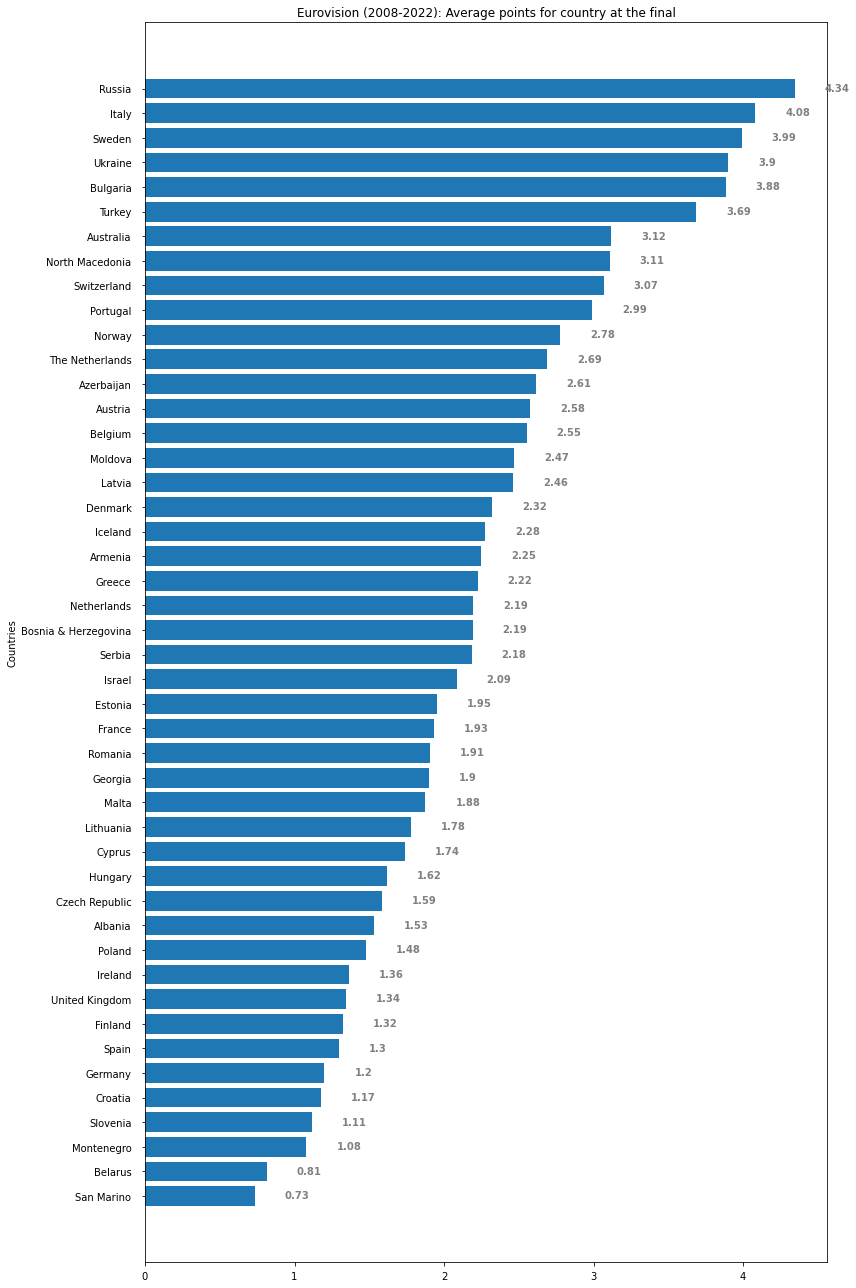

In [78]:
labels = df_average_points_per_country_in_final['To country']
avg_points = list(df_average_points_per_country_in_final['counts'])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(labels, avg_points)

ax.invert_yaxis()

ax.set_ylabel('Countries')
ax.set_title('Eurovision (2008-2022): Average points for country at the final')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

fig.tight_layout()

plt.show()

### Average points for country at the final by jury and televoting


In [83]:
df_average_points_to = df_with_semi_finals.groupby(['To country', 'From country']).agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)
df_average_points_to

Points
                            mean
To country From country         
Spain      Andorra         12.00
Andorra    Spain           12.00
Azerbaijan Turkey          12.00
Turkey     Azerbaijan      12.00
Greece     Cyprus          11.24
...                          ...
Slovakia   Turkey           0.00
           United Kingdom   0.00
Slovenia   Andorra          0.00
Estonia    Andorra          0.00
Albania    Andorra          0.00

[2198 rows x 1 columns]

In [84]:
country = 'Israel'
df_average_points_to.iloc[df_average_points_to.index.get_level_values('To country') == country]

Points
                                     mean
To country From country                  
Israel     France                6.000000
           Andorra               5.500000
           Azerbaijan            5.080000
           The Netherlands       4.428571
           Slovakia              4.333333
           Ukraine               4.210526
           Australia             4.166667
           Finland               4.043478
           Armenia               3.777778
           Norway                3.720000
           Bulgaria              3.666667
           Russia                3.562500
           Italy                 3.421053
           Sweden                3.318182
           Cyprus                3.291667
           Czech Republic        3.263158
           Germany               3.142857
           Croatia               3.050000
           Belgium               3.038462
           United Kingdom        3.000000
           Belarus               2.857143
           Georgia               2.850000
           Malta                 2.833333
           Austria               2.833333
           Spain                 2.761905
           San Marino            2.700000
           Romania               2.680000
           Iceland               2.650000
           Poland                2.619048
           Serbia                2.550000
           Switzerland           2.423077
           Bosnia & Herzegovina  2.375000
           North Macedonia       2.321429
           Ireland               2.233333
           Hungary               2.200000
           Albania               2.150000
           Moldova               2.117647
           Lithuania             1.880000
           Montenegro            1.529412
           Portugal              1.437500
           Slovenia              1.434783
           Greece                1.400000
           Denmark               1.190476
           Latvia                0.850000
           Turkey                0.600000
           Estonia               0.454545

In [85]:
df_average_points_to = df_average_points_to.reset_index()
df_average_points_to.columns = df_average_points_to.columns.droplevel(1)
# df_average_points_to = df_average_points_to[df_average_points_to['From country'] != df_average_points_to['To coun

### Average points from country to every country

In [86]:
df_average_points_from = df_with_semi_finals.groupby(['From country', 'To country', ]).agg({'Points': ['mean']}).sort_values(('Points', 'mean'), ascending = False)
df_average_points_from

,,Points
,,mean
From country,To country,
Turkey,Azerbaijan,12.00
Andorra,Spain,12.00
Azerbaijan,Turkey,12.00
Spain,Andorra,12.00
Cyprus,Greece,11.24
...,...,...
Netherlands,Albania,0.00
Australia,Netherlands,0.00


In [88]:
country = 'Turkey'
df_average_points_from.iloc[df_average_points_from.index.get_level_values('From country') == country]

Points
                                        mean
From country To country                     
Turkey       Azerbaijan            12.000000
             Bosnia & Herzegovina   9.428571
             North Macedonia        7.250000
             Armenia                7.166667
             Georgia                7.142857
             Albania                6.500000
             Bulgaria               6.250000
             The Netherlands        6.000000
             San Marino             5.000000
             Montenegro             5.000000
             Romania                4.428571
             Ukraine                3.875000
             Russia                 3.833333
             Sweden                 2.875000
             Greece                 2.833333
             Germany                2.800000
             Moldova                1.750000
             Hungary                1.750000
             Malta                  1.666667
             Iceland                1.625000
             Norway                 1.500000
             United Kingdom         1.200000
             Cyprus                 1.000000
             Andorra                1.000000
             Austria                1.000000
             Denmark                0.857143
             Croatia                0.833333
             Slovenia               0.666667
             Israel                 0.600000
             Spain                  0.600000
             Czech Republic         0.500000
             Lithuania              0.285714
             Ireland                0.250000
             Finland                0.200000
             Portugal               0.142857
             Switzerland            0.000000
             Slovakia               0.000000
             France                 0.000000
             Belarus                0.000000
             Belgium                0.000000
             Estonia                0.000000
             Italy                  0.000000
             Latvia                 0.000000
             Poland                 0.000000
             Serbia                 0.000000

In [89]:
df_average_points_from = df_average_points_from.reset_index()
df_average_points_from.columns = df_average_points_from.columns.droplevel(1)
# df_average_points_from = df_average_points_from[df_average_points_from['From country'] != df_average_points_from['To country']]

### Average points between a country and all the other participants


In [91]:
import itertools
countries = dict()
for pair in itertools.combinations(set(df_average_points_to['To country']), 2):
    countries[pair] = df_average_points_to.loc[(df_average_points_to['To country'] == pair[0]) & (df_average_points_to['From country'] == pair[1]) | 
                                               (df_average_points_to['To country'] == pair[1]) & (df_average_points_to['From country'] == pair[0])].mean()


/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/2146268945.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  countries[pair] = df_average_points_to.loc[(df_average_points_to['To country'] == pair[0]) & (df_average_points_to['From country'] == pair[1]) |


In [92]:
from math import isnan
countries = {k: countries[k]['Points'] for k in countries if not isnan(countries[k]['Points'])}

In [93]:
countries_relationship_strength = dict(sorted(countries.items(), key=lambda item: item[1], reverse=True))


In [96]:
def country_relationship_strength(country):
    df = pd.DataFrame(columns=['code', 'country', 'Average Points to ' + country, 'Average Points from ' + country, 'difference between countries', 'Average Points'])
    connection_with_country = country
    for country1, country2 in countries_relationship_strength.keys():
        if (country1 == country) | (country2 == country):
            if (country1 == country):
                connection_with_country = country2
            elif (country2 == country):
                connection_with_country = country1
            to_pts = df_average_points_to[(df_average_points_to['To country'] == country) & (df_average_points_to['From country'] == connection_with_country)]['Points']
            if len(to_pts) > 0:
                to_pts = to_pts.iloc[0]
            else:
                to_pts = float('nan')
            from_pts = df_average_points_from[(df_average_points_from['From country'] == country) & (df_average_points_from['To country'] == connection_with_country)]['Points']
            if len(from_pts) > 0: 
                from_pts = from_pts.iloc[0]
            else:
                from_pts = float('nan')
            df = df.append({
                            'country': connection_with_country, 
                            'Average Points to ' + country: to_pts,
                            'Average Points from ' + country: from_pts,
                            'difference between countries': to_pts - from_pts,
                            'Average Points': countries_relationship_strength[(country1, country2)]}, ignore_index=True)
    return df

In [97]:
country = 'Armenia'
df_country_relationships = country_relationship_strength(country)
df_country_relationships[['country', 'Average Points']]

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/

,country,Average Points
0,Russia,9.544408
1,Georgia,9.158371
2,Greece,5.976667
3,France,5.945820
4,Cyprus,5.596405
5,Ukraine,5.483333
6,Turkey,4.750000
7,The Netherlands,4.638889
8,Malta,4.404135
9,Bulgaria,4.352941


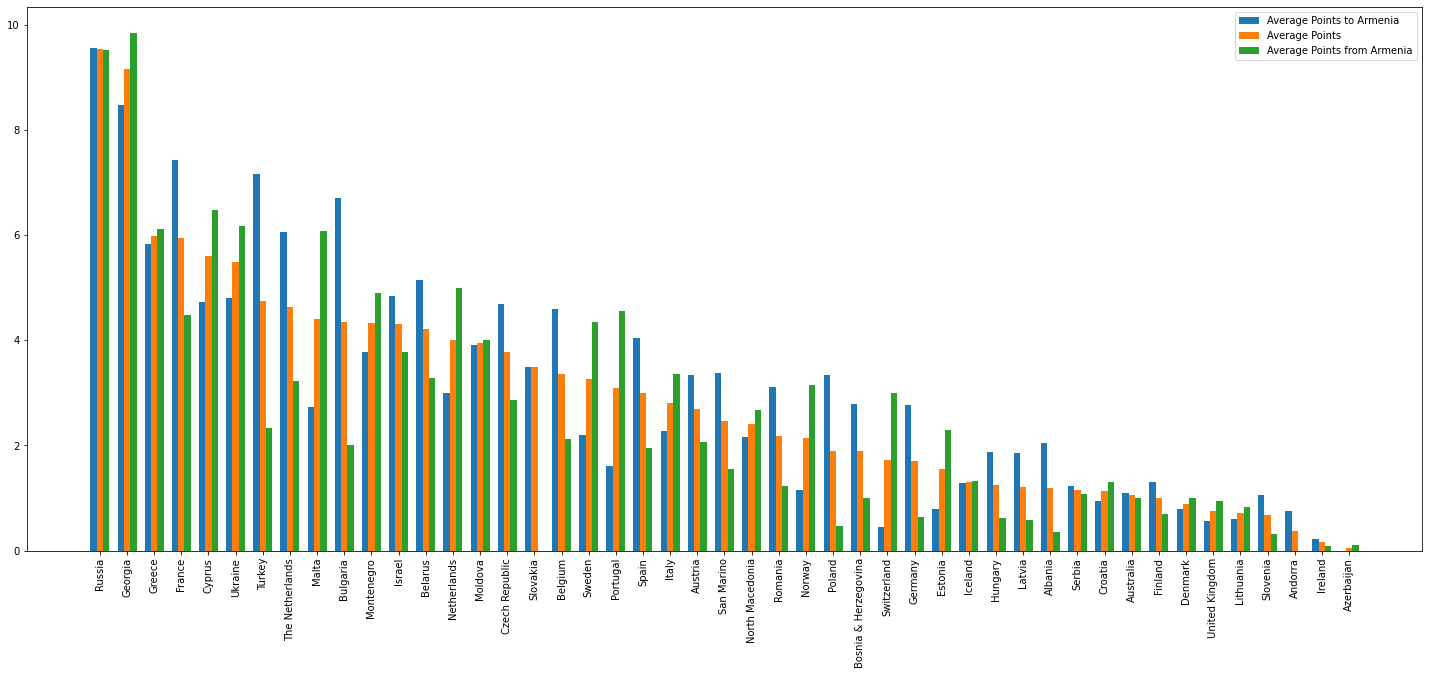

In [98]:
plt.figure(figsize=(25,10))

countries = df_country_relationships['country']
to_points = df_country_relationships['Average Points to ' + country]
avg_points = df_country_relationships['Average Points']
from_points = df_country_relationships['Average Points from ' + country]

def subcategorybar(countries, vals, width=0.8):
    n = len(vals)
    _countries = np.arange(len(countries))
    for i in range(n):
        plt.bar(_countries - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
    plt.xticks(_countries, countries, rotation='vertical')
    plt.legend(['Average Points to ' + country, 'Average Points', 'Average Points from ' + country])
    
subcategorybar(countries, [to_points, avg_points, from_points], 0.7)

plt.show()

## Hierarchical Clustering

In [99]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten

In [100]:
dist = df_average_points_to.pivot(index='From country', columns='To country', values='Points')
dist.fillna(12, inplace=True)

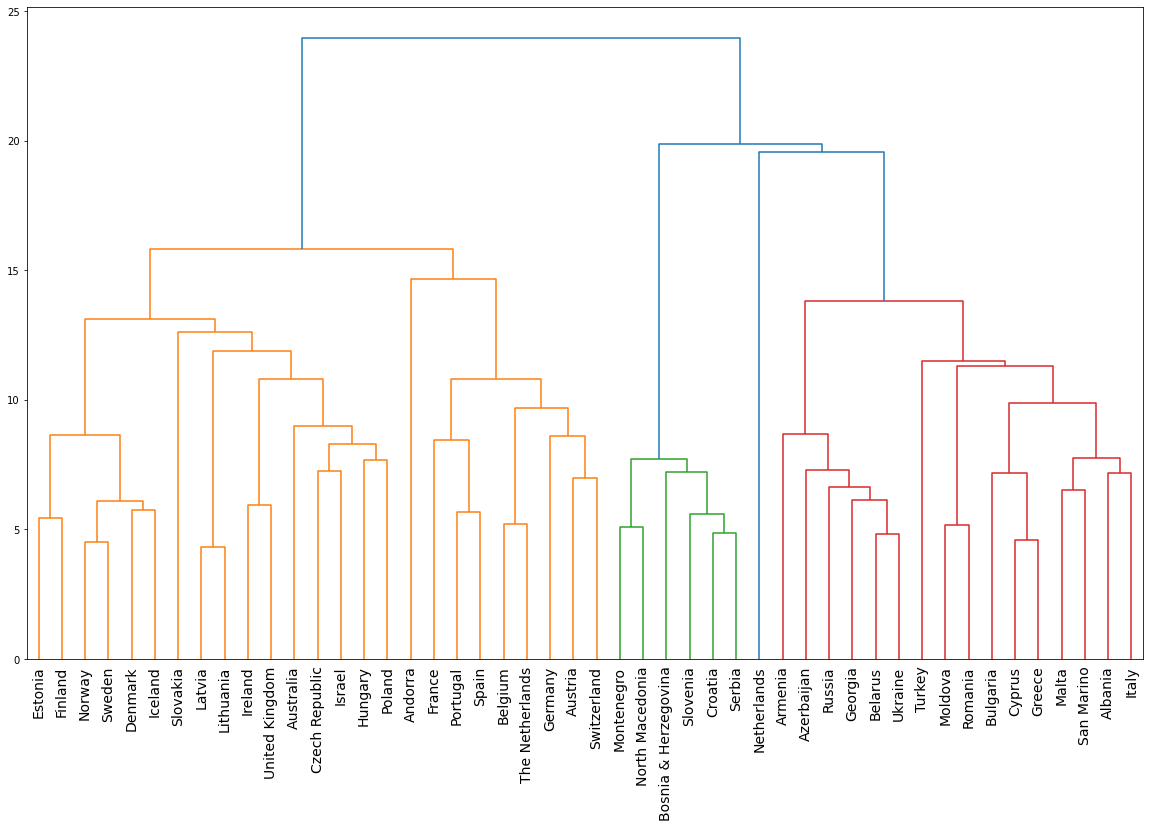

In [101]:
df_scaled = whiten(dist.to_numpy())
mergings = linkage(df_scaled, method='ward')
plt.figure(figsize=(20,12))
dn = dendrogram(mergings, labels=np.array(dist.index), color_threshold=0.7*max(mergings[:,2]), leaf_rotation=90, leaf_font_size=14)
# plt.savefig('images/hierarchical_clustering.png')
plt.show()

### Mapping the average points (to and from), given during contests with semi-finals, from jury and televoting, for a country

In [102]:
import plotly.graph_objects as go
import plotly.express as px

In [108]:
def plot_map(country):
    df = country_relationship_strength(country)

    fig = go.Figure(data=[go.Choropleth(
        
        z = [0],
        text = [country],
        colorscale='Reds',
        reversescale=True,
        ), go.Choropleth(
        locations = df['code'],
        z = df['Average Points'],
        text = df['country'],
        colorscale = 'Blues',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = 'Average points',
    )])

    fig.update_layout(
        title_text='All average votes/scores (to and from) given during the (semi) finals from jury and televoting for <b>' + country,
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='source: <a href="https://www.kaggle.com/datagraver/eurovision-song-contest-scores-19752019">\
                Eurovision Song Contest scores 2008-2022</a>',
            showarrow = False
        )]
    )
    
    return fig

In [109]:
plot_map('Turkey').show()

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_q/9n3w18px7j550bc8mwyr1jk40000gn/T/ipykernel_2181/3461529932.py:20: FutureWarning:

The frame.append method is depreca

In [107]:
def save_dataframes_and_maps(countries_set, path):
    for country in countries_set:
        
        # Saving dataframe
        df_strength = country_relationship_strength(country)
        df_strength = df_strength[['country', 'Average Points to ' + country, 'Average Points from ' + country, 'Average Points']]
        if len(df_strength != 0):
            save_dataframe(df_strength, path + "df/df_" + country + ".png")
        
        # Saving maps in png format and html
        fig = plot_map(country)
        save_map_png(fig, path + "maps/map_" + country + ".png")
        save_fig_html(fig, path + "html/html_" + country + ".html")

### Network

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [110]:
import networkx as nx
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (20,10)

### fixing bad naming in df_average_points

In [111]:
df_average_points = df_average_points_from.replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')
df_average_points = df_average_points.replace('North Macedonia', 'Macedonia')
df_average_points = df_average_points.replace('The Netherlands', 'Netherlands')

In [112]:
G = nx.from_pandas_edgelist(df_average_points, 
                            source='From country', 
                            target='To country', 
                            edge_attr='Points', 
                            create_using=nx.DiGraph())

In [113]:
print(nx.info(G))

DiGraph with 47 nodes and 2128 edges


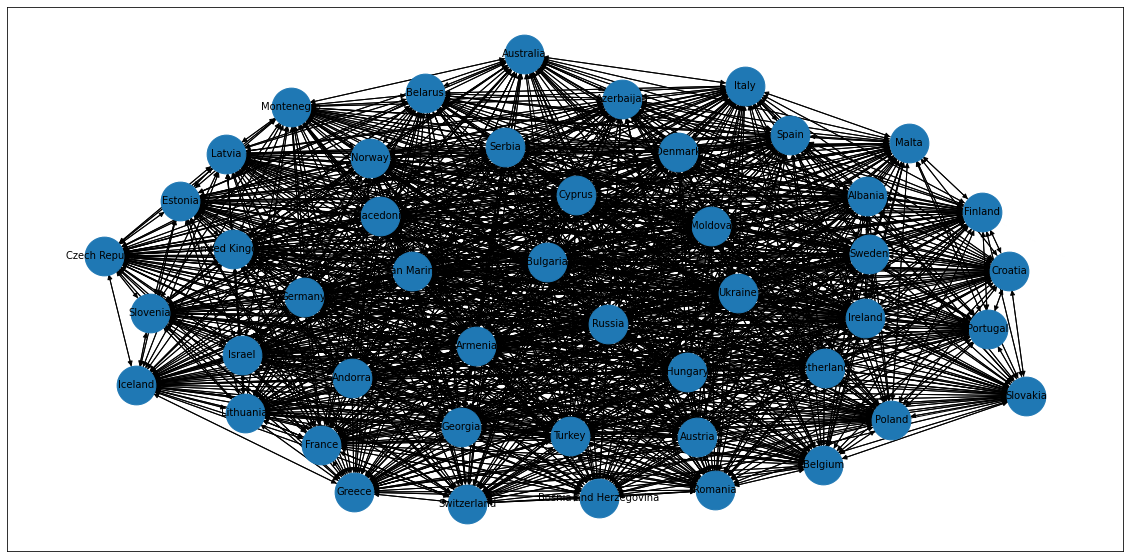

In [114]:
nx.draw_networkx(G, node_size=1500, font_size=10)